In [2]:
import numpy as np
from scipy.optimize import minimize
from IPython.display import clear_output
import time
from tqdm import tqdm
import matplotlib.pyplot as plt

rc = {"font.family" : "Times New Roman", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)

from QAOA import *
from hamiltonians import *
from heuristics import *
from visualization import *
from analysis import *

import warnings
warnings.filterwarnings("ignore")

### Statistical evaluation for the fixed depth $p=n$

In [3]:
n = 6
n_instances = 100
path = 'data/'+str(n)+'q/'
fname = str(n)+'q_nsk_'
avg_success, avg_iterations, avg_time, i_bad = get_trained_stats(path,fname,n_instances)
    
print(f"Stats for {n} qubits Sherrington-Kirpatrick model:")
print(f"Avg success rate: {avg_success}")
print(f"Avg iterations: {avg_iterations}")
print(f"Avg time: {avg_time} s")    
print(i_bad)

Stats for 6 qubits Sherrington-Kirpatrick model:
Avg success rate: 1.0
Avg iterations: 4.09
Avg time: 5.25830149 s
[]


In [4]:
n = 6
n_instances = 100
path = 'data/'+str(n)+'q/'
fname = str(n)+'q_ev_'

avg_success, avg_ar, violated_A, i_bad = get_evaluation_stats(path,fname,n_instances,eps=0.5)

print(f"Evaluation stats for {n} qubits Sherrington-Kirpatrick model:")
print(f"Avg success rate: {avg_success}")
print(f"Avg approximation ratio: {avg_ar}")
print(f"Violated configurations: {violated_A}")
print(i_bad)

Evaluation stats for 6 qubits Sherrington-Kirpatrick model:
Avg success rate: 0.96
Avg approximation ratio: 0.993823517978726
Violated configurations: 0
[24, 66, 97, 99]


[0.73 0.71 0.75 0.68 0.63 0.63]


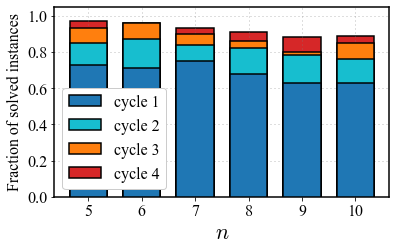

In [5]:
n_start = 5
n_end = 10
n_instances = 100


ns = np.array(range(n_start,n_end+1))
success = np.zeros(len(ns))
ar_data = np.zeros(len(ns))
success_lst = []
labels = []

for k in range(4):

    for i in range(len(ns)):
        path = f'data_cycle_{k+1}/'+str(ns[i])+'q/'
        fname = str(ns[i])+'q_ev_'
    
        success[i], ar_data[i], violated_A, i_bad = get_evaluation_stats(path,fname,n_instances,eps=0.5)
    success_lst.append(success.copy())
    labels.append(f'cycle {k+1}')  

print(success_lst[0])

colors = ['tab:blue', 'tab:cyan', 'tab:orange', 'tab:red']
plot_bars_n(ns,success_lst,labels,colors)

## Statistical evaluation in the range of circuit depths up to $p=10$ layers

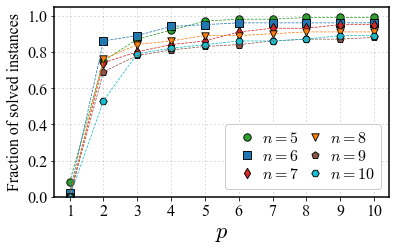

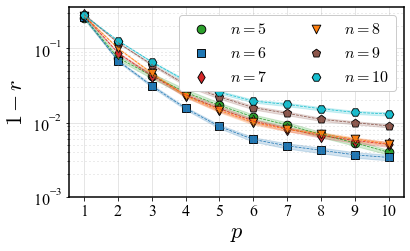

In [6]:
n_start = 5
n_end = 10
n_instances = 100
p_max = 10

data_frac_lst = []
data_r_lst = []
data_ovlp_lst = []
labels = []

ns = np.array(range(n_start,n_end+1))
pp = np.array(range(1,p_max+1))  

for i in range(len(ns)):
    
    path = 'data/'+str(ns[i])+'q/'
    fname = str(ns[i])+'q_lw_'
    
    avg_r, var_r,  avg_ovlp, var_ovlp, frac_solved, i_bad = get_lw_stats(path,fname,p_max,n_instances,eps=0.5)
    data_frac_lst.append(frac_solved)
    labels.append(f"$n={ns[i]}$")
    
    data_r = np.zeros((p_max,3))
    data_r[:,0] = pp
    data_r[:,1] = avg_r
    data_r[:,2] = var_r
    data_r_lst.append(data_r)

markers = ['o', 's', 'd', 'v', 'p', 'H']
colors = ['tab:green', 'tab:blue', 'tab:red', 'tab:orange', 'tab:brown', 'tab:cyan']

plot_frac_solved(pp,data_frac_lst,labels,markers,colors)
plot_energies_log_avg(data_r_lst,labels,markers,colors,1e-3)

### Performance comparison to standard QAOA

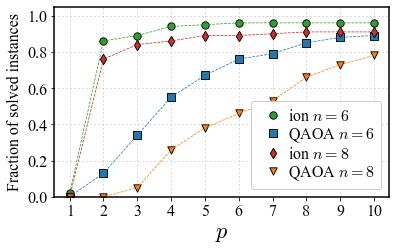

In [7]:
n_instances = 100
p_max = 10


data_frac_lst = []
labels = []

pp = np.array(range(1,p_max+1))  


for n in [6,8]:

    path = 'data/'+str(n)+'q/'
    fname = str(n)+'q_lw_'
    
    avg_r, var_r,  avg_ovlp, var_ovlp, frac_solved, i_bad = get_lw_stats(path,fname,p_max,n_instances)
    data_frac_lst.append(frac_solved)
    labels.append(f"ion $n={n}$")

    path = 'data/'+str(n)+'q_qaoa/'
    fname = str(n)+'q_qaoa_'
    
    avg_r, var_r,  avg_ovlp, var_ovlp, frac_solved, i_bad = get_lw_stats(path,fname,p_max,n_instances,s=1)
    data_frac_lst.append(frac_solved)   
    labels.append(f"QAOA $n={n}$")

markers = ['o', 's', 'd', 'v', 'p', 'H']
colors = ['tab:green', 'tab:blue', 'tab:red', 'tab:orange', 'tab:brown', 'tab:cyan']

plot_frac_solved(pp,data_frac_lst,labels,markers,colors,ncol=1)

